#1. Data Load

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

import lightgbm as lgbm
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier

In [3]:
!python --version
print('pandas', pd.__version__)
print('matplotlib', mpl.__version__)
print('csv', csv.__version__)
print('numpy', np.__version__)
print('seaborn', sns.__version__)

Python 3.10.11
pandas 1.5.3
matplotlib 3.7.1
csv 1.0
numpy 1.22.4
seaborn 0.12.2


In [4]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/sample_data/

/content/sample_data


In [6]:
#데이터 가져오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data/dna/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data/dna/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data/dna/sample_submission.csv')
snp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data/dna/snp_info.csv')

In [7]:
#seed 고정
import random
import os
class CFG:
    SEED = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED)

In [8]:
#결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [9]:
#결측치 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      175 non-null    object
 1   father  175 non-null    int64 
 2   mother  175 non-null    int64 
 3   gender  175 non-null    int64 
 4   trait   175 non-null    int64 
 5   SNP_01  175 non-null    object
 6   SNP_02  175 non-null    object
 7   SNP_03  175 non-null    object
 8   SNP_04  175 non-null    object
 9   SNP_05  175 non-null    object
 10  SNP_06  175 non-null    object
 11  SNP_07  175 non-null    object
 12  SNP_08  175 non-null    object
 13  SNP_09  175 non-null    object
 14  SNP_10  175 non-null    object
 15  SNP_11  175 non-null    object
 16  SNP_12  175 non-null    object
 17  SNP_13  175 non-null    object
 18  SNP_14  175 non-null    object
 19  SNP_15  175 non-null    object
dtypes: int64(4), object(16)
memory usage: 27.5+ KB


#2. EDA

In [10]:
#데이터 구성(train)
snp_num1 = train.columns[train.columns.str.contains('SNP')].tolist()
for num1 in snp_num1:
  def count_into_lst(lst):
      answer=dict()
      for num in train[num1]:
          if num not in answer.keys():
              answer[num]=1
          else:
              answer[num]+=1
      return answer
  num_train1 =count_into_lst(train[num1])
  
  print(num_train1)

{'G G': 141, 'A G': 71, 'A A': 50}
{'A G': 97, 'G G': 108, 'A A': 57}
{'A A': 122, 'C A': 92, 'C C': 48}
{'G A': 93, 'A A': 120, 'G G': 49}
{'C A': 86, 'A A': 94, 'C C': 82}
{'A A': 61, 'A G': 122, 'G G': 79}
{'A A': 163, 'G G': 51, 'G A': 48}
{'G G': 79, 'G A': 96, 'A A': 87}
{'A A': 182, 'G A': 56, 'G G': 24}
{'G G': 151, 'A G': 68, 'A A': 43}
{'A G': 96, 'A A': 83, 'G G': 83}
{'A A': 136, 'G A': 73, 'G G': 53}
{'A A': 52, 'G G': 115, 'A G': 95}
{'A A': 185, 'C C': 23, 'C A': 54}
{'A A': 107, 'G G': 55, 'G A': 100}


In [11]:
#데이터 구성(test)
snp_num2 = test.columns[test.columns.str.contains('SNP')].tolist()
for num2 in snp_num2:
  def count_into_lst(lst):
      answer=dict()
      for num in train[num2]:
          if num not in answer.keys():
              answer[num]=1
          else:
              answer[num]+=1
      return answer
  num_train2 =count_into_lst(test[num2])
  
  print(num_train2)

{'G G': 141, 'A G': 71, 'A A': 50}
{'A G': 97, 'G G': 108, 'A A': 57}
{'A A': 122, 'C A': 92, 'C C': 48}
{'G A': 93, 'A A': 120, 'G G': 49}
{'C A': 86, 'A A': 94, 'C C': 82}
{'A A': 61, 'A G': 122, 'G G': 79}
{'A A': 163, 'G G': 51, 'G A': 48}
{'G G': 79, 'G A': 96, 'A A': 87}
{'A A': 182, 'G A': 56, 'G G': 24}
{'G G': 151, 'A G': 68, 'A A': 43}
{'A G': 96, 'A A': 83, 'G G': 83}
{'A A': 136, 'G A': 73, 'G G': 53}
{'A A': 52, 'G G': 115, 'A G': 95}
{'A A': 185, 'C C': 23, 'C A': 54}
{'A A': 107, 'G G': 55, 'G A': 100}


In [12]:
gen_im1 = ['father','mother','gender']
for im1 in gen_im1:
  def count_into_lst(lst):
      answer=dict()
      for num in train[im1]:
          if num not in answer.keys():
              answer[num]=1
          else:
              answer[num]+=1
      return answer
  print(count_into_lst(train[im1]))

{0: 262}
{0: 262}
{0: 262}


In [13]:
gen_im2 = ['father','mother','gender']
for im2 in gen_im2:
  def count_into_lst(lst):
      answer=dict()
      for num in test[im2]:
          if num not in answer.keys():
              answer[num]=1
          else:
              answer[num]+=1
      return answer
  print(count_into_lst(test[im2]))

{0: 175}
{0: 175}
{0: 175}


### **데이터 정제**
- 상관 관계 & 모델링을 위한 int로 변환

In [16]:
# class 변수 A, B, C 각각 0,1,2로 변환
train['class'] = train['class'].map({'A':0, 'B':1, 'C':2}).astype(int)

In [17]:
# 변수 변환
snp_col = train.columns[train.columns.str.contains('SNP')].tolist()
for col in snp_col:
  train[col] = train[col].map({'A A':1, 'G G':11, 'A G':111, 'G A':1111, 'C C':11111, 'A C':111111, 'C A':1111111}).astype(int)
  test[col] = test[col].map({'A A':1, 'G G':11, 'A G':111, 'G A':1111, 'C C':11111, 'A C':111111, 'C A':1111111}).astype(int)

### **상관관계 확인**

<Axes: >

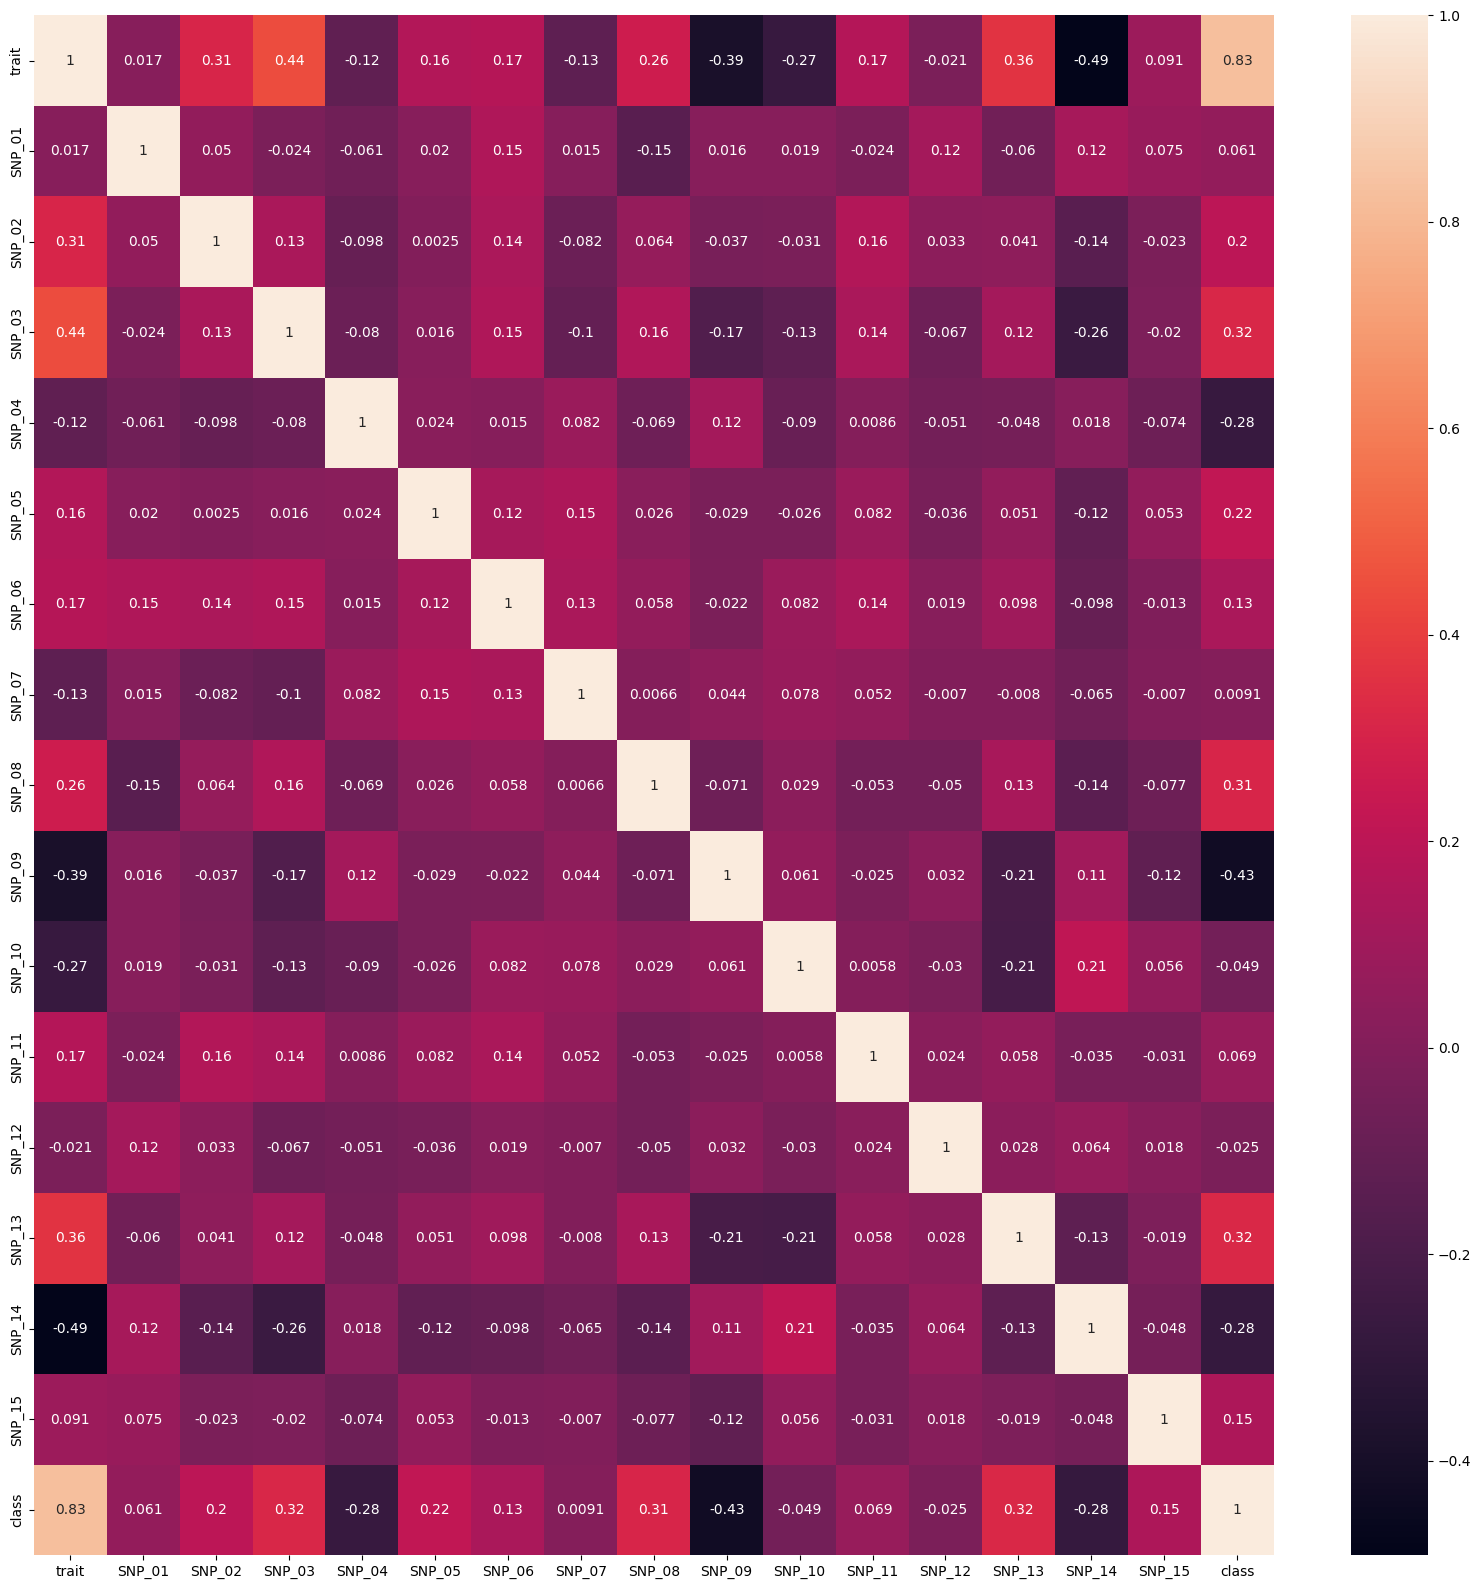

In [18]:
# train의 변수 간 상관관계/상관계수 확인
corr_data = train.drop(['father', 'mother', 'gender'], axis = 1)
plt.figure(figsize=(20,20))
sns.heatmap(data = corr_data.corr(), annot=True)

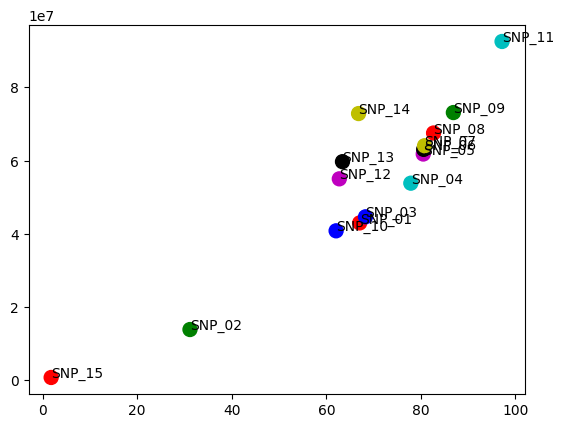

In [19]:
#snp 중 cm과 pos 관계 그래프
X = snp['cm']
y = snp['pos']
plt.scatter(X,y,
            marker = 'o',
            s = 100,
            c = ['r','g','b','c','m','k','y','r','g','b','c','m','k','y','r']
            ) 
for X,y,name in zip(X,y,snp['SNP_id']):
  plt.text(X,y,name)
plt.show()

#3. Feature Engineering

In [20]:
# 파생변수 생성
train['SNP_1013'] = train['SNP_10'] + train['SNP_13']
test['SNP_1013'] = test['SNP_10'] + test['SNP_13']

In [21]:
#변수 선택
X_train = train.drop(['id', 'father', 'mother', 'gender','class','SNP_01','SNP_06','SNP_10','SNP_12','SNP_13'], axis = 1)
y_train = train['class']
X_test = test.drop(['id', 'father', 'mother', 'gender','SNP_01','SNP_06','SNP_10','SNP_12','SNP_13'], axis = 1)

In [22]:
X_train.head()

,trait,SNP_02,SNP_03,SNP_04,SNP_05,SNP_07,SNP_08,SNP_09,SNP_11,SNP_14,SNP_15,SNP_1013
0,2,111,1,1111,1111111,1,11,1,111,1,1,12
1,2,111,1111111,1,1,1,1111,1,1,1,1,122
2,2,11,1,1111,11111,1,1111,1111,1,1,1,112
3,1,11,1,1111,1,11,1,11,11,1,11,122
4,2,11,11111,1,11111,1,1,1,1,1,1111,122


In [23]:
X_train.shape, y_train.shape, X_test.shape

((262, 12), (262,), (175, 12))

#4. Modeling

In [24]:
#lightGBM, ExtraTreesClassifier, RandomForestClassifier 선택
model = lgbm.LGBMClassifier()

et_cls = ExtraTreesClassifier(n_estimators=500, min_samples_leaf=5, min_samples_split=7, max_features=12)
rf_cls = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, min_samples_split=7, max_features=12)
lg_cls = model.fit(X_train,y_train)

# 모델 voting
voting = VotingClassifier(
    estimators=[
        ('et', et_cls),
        ('rf', rf_cls),
        ('lg', lg_cls)
    ]
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(max_features=12,
                                                   min_samples_leaf=5,
                                                   min_samples_split=7,
                                                   n_estimators=500)),
                             ('rf',
                              RandomForestClassifier(max_features=12,
                                                     min_samples_leaf=5,
                                                     min_samples_split=7,
                                                     n_estimators=500)),
                             ('lg', LGBMClassifier())])

# 5. Result 도출

In [25]:
# int -> object로 재변환 후 저장
pred = voting.predict(X_test)
sub['class'] = pred

sub['class'] = sub['class'].map({0:'A', 1:'B', 2:'C'}).astype(object)
sub.to_csv("/content/sample_data/gendata.csv", index = False)

In [26]:
sub.head()

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,C
4,TEST_004,A
